<a href="https://colab.research.google.com/github/divyu135/HAR/blob/main/ProjectB_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copy data from google drive and Unzip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir dataset
!unzip "/content/drive/MyDrive/dataset.zip" -d dataset

Mounted at /content/drive
Archive:  /content/drive/MyDrive/dataset.zip
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       



# Human Activity Recognition using SmartPhone



---



In [41]:
import warnings
warnings.simplefilter(action="ignore")

## Loading Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
train = pd.read_csv('dataset/train.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [4]:
train.count()

tBodyAcc-mean()-X       7352
tBodyAcc-mean()-Y       7352
tBodyAcc-mean()-Z       7352
tBodyAcc-std()-X        7352
tBodyAcc-std()-Y        7352
                        ... 
angle(X,gravityMean)    7352
angle(Y,gravityMean)    7352
angle(Z,gravityMean)    7352
subject                 7352
Activity                7352
Length: 563, dtype: int64

In [5]:
test = pd.read_csv('dataset/test.csv')
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

## Data Cleaning

### Check for Duplicates and NaN values

In [6]:
print("Duplicates")
print('{} duplicates values in train dataset'.format(sum(train.duplicated())))
print('{} duplicates values in test dataset'.format(sum(test.duplicated())))

print("\nNaN:")
print('{} NaN/Null values in train dataset'.format(train.isnull().values.sum()))
print('{} NaN/Null values in test dataset'.format(test.isnull().values.sum()))

Duplicates
0 duplicates values in train dataset
0 duplicates values in test dataset

NaN:
0 NaN/Null values in train dataset
0 NaN/Null values in test dataset


### Data imbalance

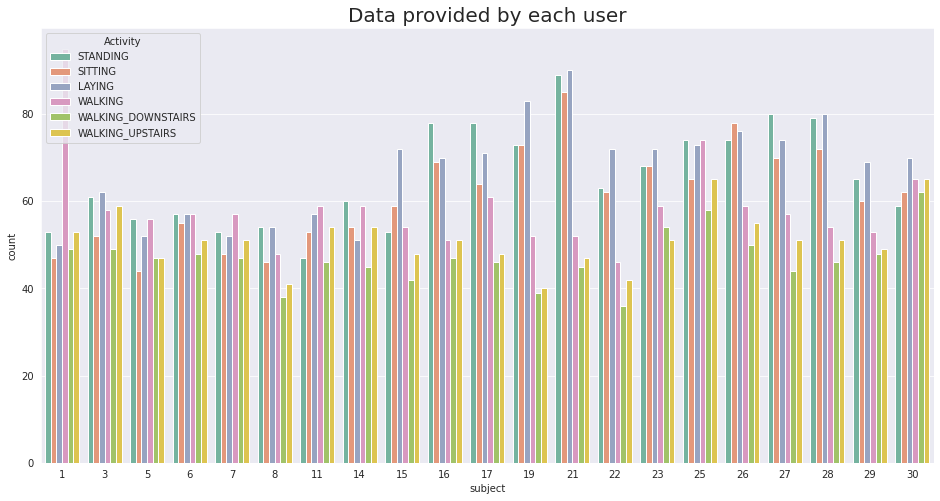

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette("Set2", desat=0.90)
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()

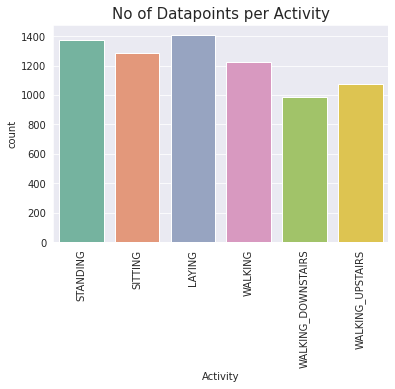

In [8]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.set_palette("Set2", desat=0.90)
sns.countplot(train.Activity)
plt.xticks(rotation=90)
plt.show()

**Observation**

*   There are no duplicates in the train and test dataset and also,there are no null values in both datasets.  
*   As we can observe from above graphs, we have almost same number of reading from all the subjects and there are without any large difference. Therefore we can say that the training dataset is well balanced.



### Cleaning feature names 

We can get the features by getting columns from the datasets but as observe above the features name have brackets, so we will simply remove brackets and commas.

In [9]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

print("Train features : {} ....".format(list(train.columns[:5])))
print("Test features : {} ....".format(list(test.columns[:5])))

# save the updated cleaned dataframes to csv
train.to_csv('dataset/cleaned_train.csv', index=False)
test.to_csv('dataset/cleaned_test.csv', index=False)

Train features : ['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX', 'tBodyAccstdY'] ....
Test features : ['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX', 'tBodyAccstdY'] ....


## Exploratory Data Analysis

#### Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




#### Stationary and Moving activities are completely different

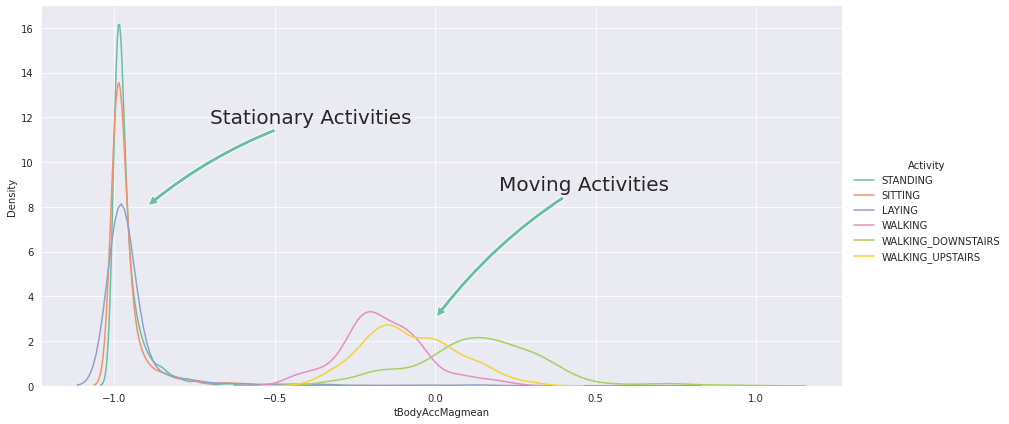

In [10]:
sns.set_palette("Set2", desat=0.90)
facetgrid = sns.FacetGrid(train, hue='Activity', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.9,8), xytext=(-0.7, 12), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()


As we can clearly see the difference between stationary activities and Moving Activities

as per above pdf distribution we can look closer by dividing these pdfs 

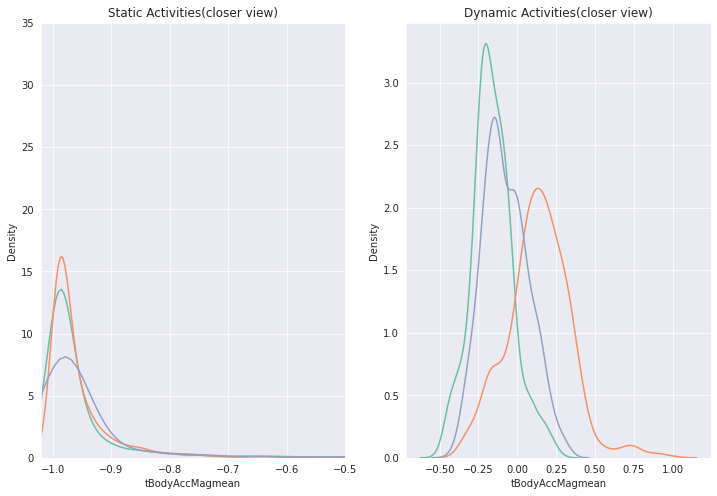

In [11]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]



plt.figure(figsize=(12,8))
plt.subplot(1,2,1)

plt.title("Static Activities(closer view)")
sns.set_palette("Set2", desat=0.90)
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMagmean'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)

plt.title("Dynamic Activities(closer view)")
sns.set_palette("Set2", desat=0.90)
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist = False, label = 'Laying')

#### Magnitude of an acceleration can saperate it well

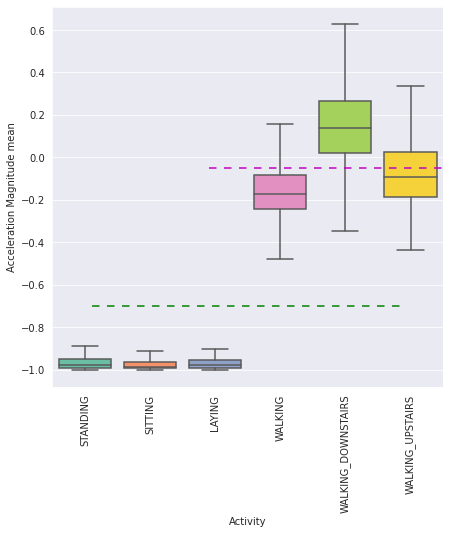

In [12]:
plt.figure(figsize=(7,7))
sns.set_palette("Set2", desat=0.90)
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

#### Position of GravityAccelerationComponants also matters 

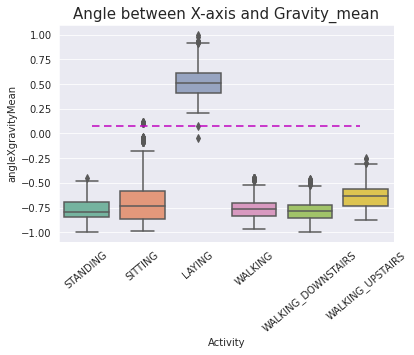

In [13]:
sns.set_palette("Set2", desat=0.90)
sns.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

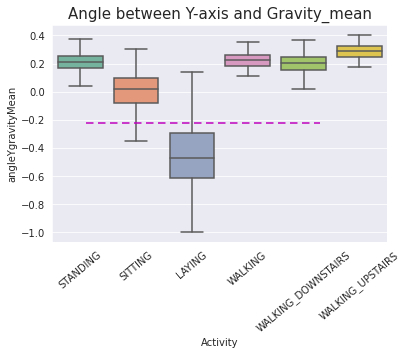

In [14]:
sns.set_palette("Set2", desat=0.90)
sns.boxplot(x='Activity', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

## Apply t-sne on the data 

In [15]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

Here we will see these datapoints in 2 dimensions and try to observe the behaviour of the datapoints

In [16]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.set_palette("Set2", desat=0.90) 
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...
[t-SNE] Computed neighbors for 7352 samples in 1.990s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.067s
[t-SNE] Iteration 50: error = 114.2027359, gradient norm = 0.0190033 (50 iterations in 3.871s)
[t-SNE] Iteration 100: error = 98.1159515, gradient norm = 0.0163854 (50 iterations in 

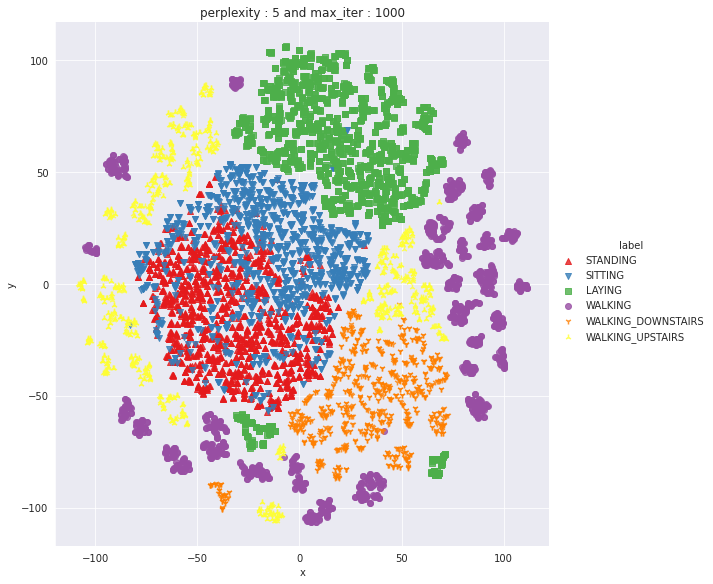

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.771s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.109s
[t-SNE] Iteration 50: error = 105.4474640, gradient norm = 0.0246067 (50 iterations in 3.661s)
[t-SNE] Iteration 100: error = 90.6492081, gradient norm = 0.0097774 (50 iteratio

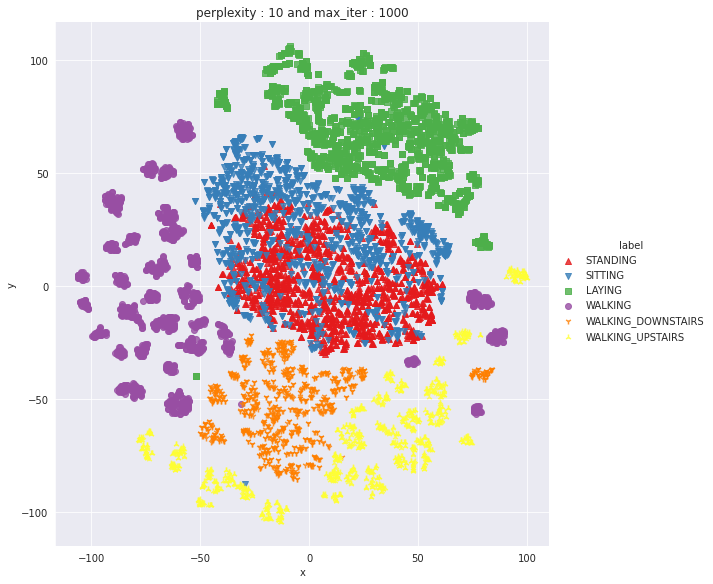

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...
[t-SNE] Computed neighbors for 7352 samples in 1.781s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.207s
[t-SNE] Iteration 50: error = 97.1486053, gradient norm = 0.0264741 (50 iterations in 3.465s)
[t-SNE] Iteration 100: error = 83.8598785, gradient norm = 0.0066690 (50 iteration

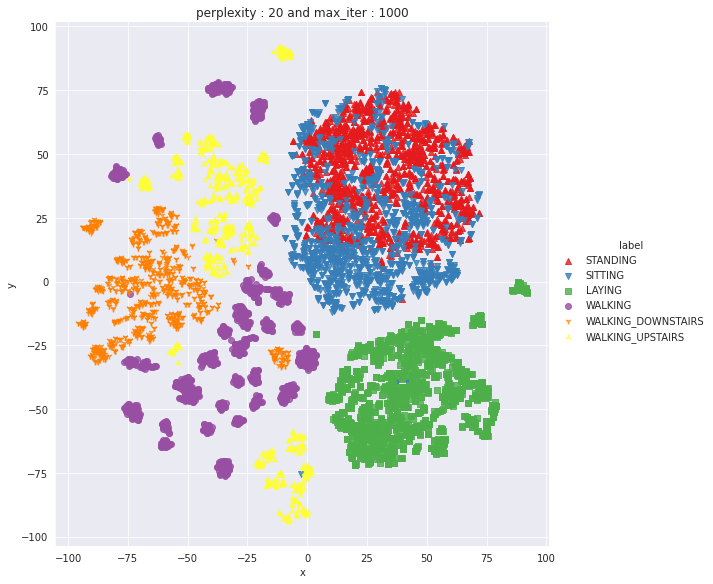

Done


In [17]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])

### ***Conclusion***

-->As we can see all the features except standing and sitting can be seperated very easily 

--> Model will probably be confused between standing and sitting

## Machine Learning Models

We will implement some these machine learning algorithm and observe how each model performs

* Logistic Regression
* Linear SVC 
* Decision Trees
* K Nearest Neighbors
* Gaussian Naive Byes
* Bagging Classifier
* Random Forest Classifier
* Extra Trees Classifier

#### Generic Functions

In [18]:
y_train = train.Activity
X_train = train.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)


In [19]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Oranges):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [22]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

#### Logistic Regression

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:28.059057


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.019485


---------------------
|      Accuracy      |
---------------------

    0.9586019681031558


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 405  11]
 [  0   0   0  24   1 446]]


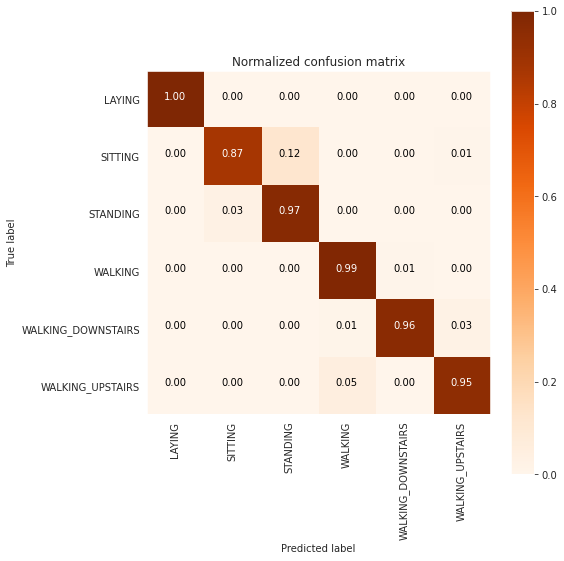

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   

In [23]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(log_reg_grid_results['model'])

#### Linear SVC

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:01:28.380103


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.014626


---------------------
|      Accuracy      |
---------------------

    0.9667458432304038


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


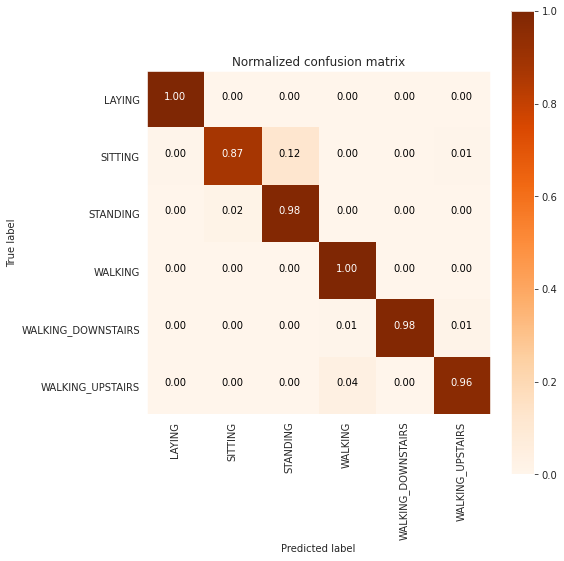

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
---------

In [24]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(lr_svc_grid_results['model'])

#### DecisionTreeClassifier

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:32.068604


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.009747


---------------------
|      Accuracy      |
---------------------

    0.8696979979640312


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 372 119   0   0   0]
 [  0  61 471   0   0   0]
 [  0   0   0 472  17   7]
 [  0   0   0  27 349  44]
 [  0   0   0  67  42 362]]


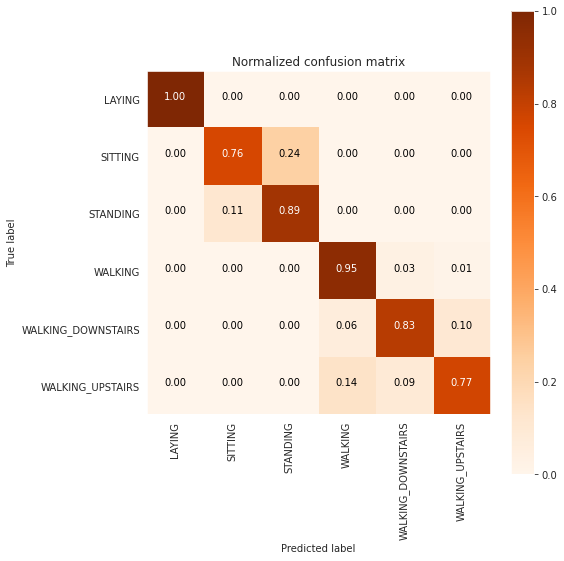

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.76      0.81       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.83      0.95      0.89       496
WALKING_DOWNSTAIRS       0.86      0.83      0.84       420
  WALKING_UPSTAIRS       0.88      0.77      0.82       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets

In [25]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

#### K Neighbors Classifier

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:09.034514


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:01.139895


---------------------
|      Accuracy      |
---------------------

    0.9022734984730234


--------------------
| Confusion Matrix |
--------------------

 [[534   2   1   0   0   0]
 [  0 394  93   0   0   4]
 [  0  35 497   0   0   0]
 [  0   0   0 482  12   2]
 [  0   0   0  48 333  39]
 [  0   0   0  42  10 419]]


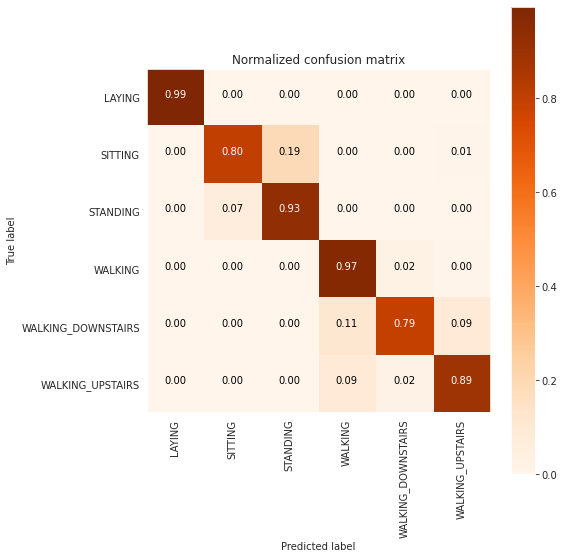

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       537
           SITTING       0.91      0.80      0.85       491
          STANDING       0.84      0.93      0.89       532
           WALKING       0.84      0.97      0.90       496
WALKING_DOWNSTAIRS       0.94      0.79      0.86       420
  WALKING_UPSTAIRS       0.90      0.89      0.90       471

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947

--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(n_neighbors=7)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_neighbors': 7}

---------------------------------
|   No of CrossValidation se

In [26]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':np.arange(3,10,2)}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn,param_grid=parameters, n_jobs=-1)
knn_grid_results = perform_model(knn_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(knn_grid_results['model'])

#### Gaussian Naive Byes

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:38.434073


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.065165


---------------------
|      Accuracy      |
---------------------

    0.8215134034611469


--------------------
| Confusion Matrix |
--------------------

 [[536   0   0   0   0   1]
 [  0 239 250   0   0   2]
 [  0   2 529   0   0   1]
 [  0   0   0 463  19  14]
 [  0   0   0 142 206  72]
 [  0   0   0  17   6 448]]


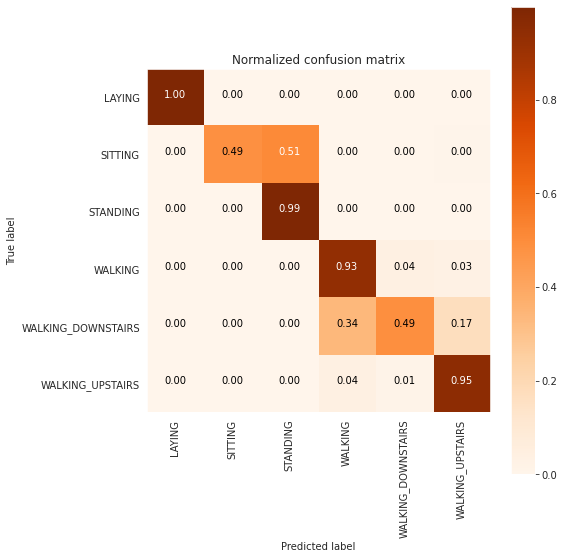

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.99      0.49      0.65       491
          STANDING       0.68      0.99      0.81       532
           WALKING       0.74      0.93      0.83       496
WALKING_DOWNSTAIRS       0.89      0.49      0.63       420
  WALKING_UPSTAIRS       0.83      0.95      0.89       471

          accuracy                           0.82      2947
         macro avg       0.86      0.81      0.80      2947
      weighted avg       0.86      0.82      0.81      2947

--------------------------
|      Best Estimator     |
--------------------------

	GaussianNB(var_smoothing=0.1873817422860384)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'var_smoothing': 0.1873817422860384}

---------------------------------


In [27]:
from sklearn.naive_bayes import GaussianNB
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb = GaussianNB()
gnb_grid = GridSearchCV(gnb,param_grid=parameters, n_jobs=-1)
gnb_grid_results = perform_model(gnb_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gnb_grid_results['model'])

#### Bagging Classifier

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:20:32.506682


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.333033


---------------------
|      Accuracy      |
---------------------

    0.8988802171700034


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 409  82   0   0   0]
 [  0  76 456   0   0   0]
 [  0   0   0 480  11   5]
 [  0   0   0  36 340  44]
 [  0   0   0  38   6 427]]


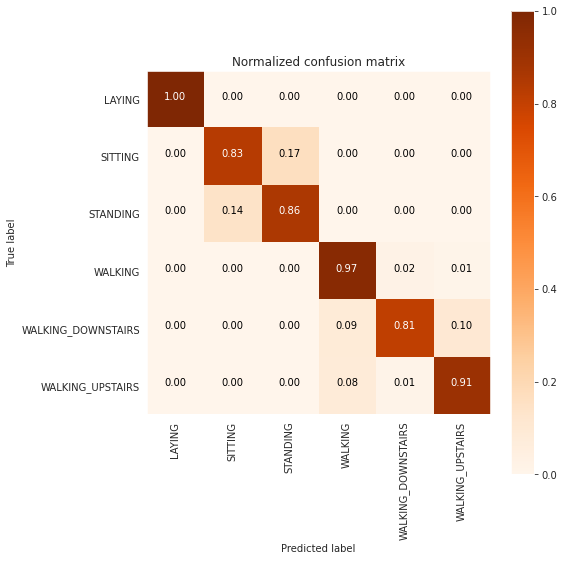

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.84      0.83      0.84       491
          STANDING       0.85      0.86      0.85       532
           WALKING       0.87      0.97      0.91       496
WALKING_DOWNSTAIRS       0.95      0.81      0.88       420
  WALKING_UPSTAIRS       0.90      0.91      0.90       471

          accuracy                           0.90      2947
         macro avg       0.90      0.90      0.90      2947
      weighted avg       0.90      0.90      0.90      2947

--------------------------
|      Best Estimator     |
--------------------------

	BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_features=0.5, max_samples=0.1, n_estimators=100)

--------------------------
|     Best parameters     |
--------------------------
	Parameters

In [28]:
from sklearn.ensemble import BaggingClassifier
parameters = {
    'base_estimator__max_depth' : [5, 10, 15, 20],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}
bc = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 100, max_features = 0.5)
bc_grid = GridSearchCV(bc,param_grid=parameters, n_jobs=-1)
bc_grid_results = perform_model(bc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(bc_grid_results['model'])

#### Random Forest Classifier

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:06:02.670377


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.038138


---------------------
|      Accuracy      |
---------------------

    0.9178825924669155


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 422  69   0   0   0]
 [  0  38 494   0   0   0]
 [  0   0   0 482   8   6]
 [  0   0   0  27 351  42]
 [  0   0   0  45   7 419]]


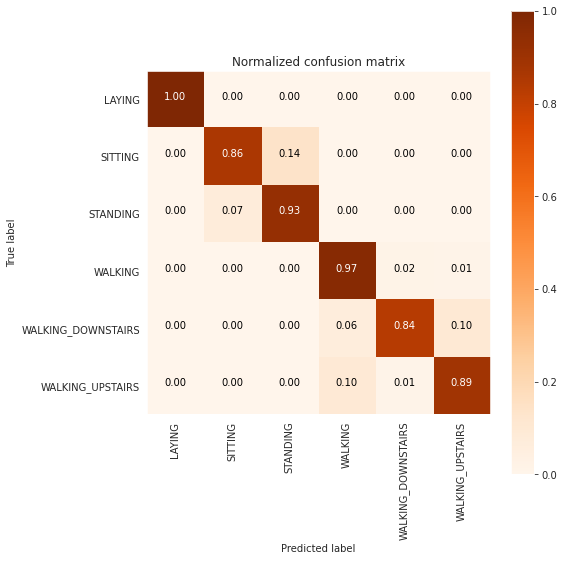

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.86      0.89       491
          STANDING       0.88      0.93      0.90       532
           WALKING       0.87      0.97      0.92       496
WALKING_DOWNSTAIRS       0.96      0.84      0.89       420
  WALKING_UPSTAIRS       0.90      0.89      0.89       471

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=10, min_samples_split=8, n_estimators=40)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 10, 'min_samples_split': 8, '

In [33]:
from sklearn.ensemble import RandomForestClassifier
parameters = {
             'n_estimators':np.arange(20,50,10),
             'min_samples_split':np.arange(2, 11, 2),
             'max_depth': [5,10,20]
}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc,param_grid=parameters, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

#### Extra Trees Classifier

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:23.010701


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.118445


---------------------
|      Accuracy      |
---------------------

    0.9419748897183576


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 436  54   0   0   1]
 [  0  15 517   0   0   0]
 [  0   0   0 488   7   1]
 [  0   0   0  15 361  44]
 [  0   0   0  30   4 437]]


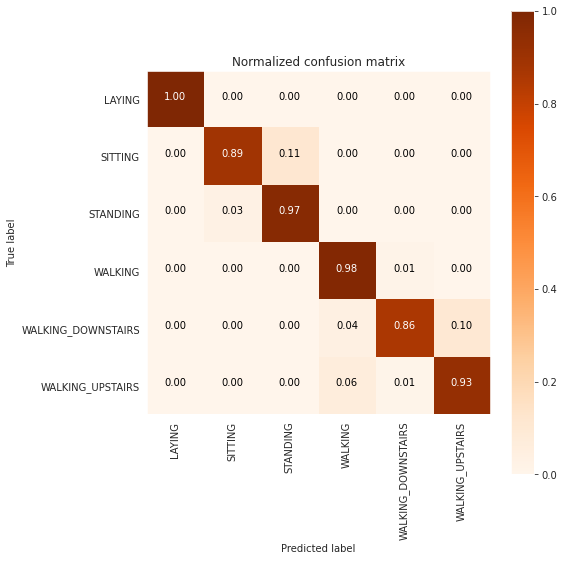

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.89      0.93       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.92      0.98      0.95       496
WALKING_DOWNSTAIRS       0.97      0.86      0.91       420
  WALKING_UPSTAIRS       0.90      0.93      0.92       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947

--------------------------
|      Best Estimator     |
--------------------------

	ExtraTreesClassifier(n_estimators=151)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 151}

---------------------------------
|   No of CrossValidat

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
parameters = {'n_estimators': np.arange(1,200,50)}
etc = ExtraTreesClassifier()
etc_grid = GridSearchCV(etc,param_grid=parameters, n_jobs=-1)
etc_grid_results = perform_model(etc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(etc_grid_results['model'])

## Comparision & Conclusion

#### Accurracy & Error

In [35]:
print('\n                     \tAccuracy          Error')
print('                       ----------\t--------')
print('Logistic Regression : \t{:.04}% \t\t {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : \t{:.04}% \t\t {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('DecisionTree        : \t{:.04}% \t\t {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('K Nearest Neighbors : \t{:.04}% \t\t {:.04}% '.format(knn_grid_results['accuracy'] * 100,\
                                                        100-(knn_grid_results['accuracy'] * 100)))

print('Gaussian Naive Byes : \t{:.04}% \t\t {:.04}% '.format(gnb_grid_results['accuracy'] * 100,\
                                                        100-(gnb_grid_results['accuracy'] * 100)))

print('BaggingClassifier : \t{:.04}% \t\t {:.04}% '.format(bc_grid_results['accuracy'] * 100,\
                                                        100-(bc_grid_results['accuracy'] * 100)))

print('RandForestClassifier : \t{:.04}% \t\t {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))

print('ExtraTreesClassifier : \t{:.04}% \t\t {:.04}% '.format(etc_grid_results['accuracy'] * 100,\
                                                        100-(etc_grid_results['accuracy'] * 100)))


                     	Accuracy          Error
                       ----------	--------
Logistic Regression : 	95.86% 		 4.14%
Linear SVC          : 	96.67% 		 3.325% 
DecisionTree        : 	86.97% 		 13.03% 
K Nearest Neighbors : 	90.23% 		 9.773% 
Gaussian Naive Byes : 	82.15% 		 17.85% 
BaggingClassifier : 	89.89% 		 10.11% 
RandForestClassifier : 	91.79% 		 8.212% 
ExtraTreesClassifier : 	94.2% 		 5.803% 


In [78]:
names = ["LogisticRegression","LinearSVC","DecisionTree","KNN","G-NaiveByes","Bagging","RandomForest","ExtraTrees"]
all_models = [log_reg_grid_results,lr_svc_grid_results,dt_grid_results,knn_grid_results,gnb_grid_results,bc_grid_results,rfc_grid_results,etc_grid_results]

In [89]:
accuracy_data = [x["accuracy"]*100 for x in all_models]
time_data = [x["testing_time"].total_seconds()+x["training_time"].total_seconds() for x in all_models]
models_df = pd.DataFrame({'names': names, 'accurracy': accuracy_data, 'time':time_data })

#### Accurracy of Each ML Algorithm (Plot)

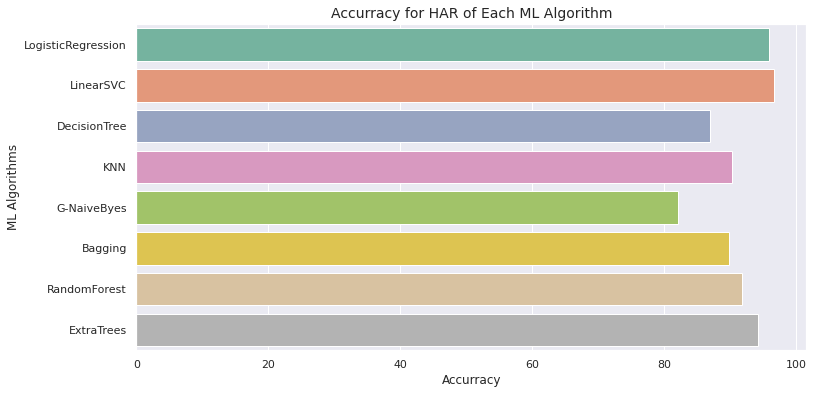

In [109]:
plt.title('Accurracy for HAR of Each ML Algorithm', fontsize=14)
sns.set(rc={'figure.figsize':(6,10)})
sns.set_palette("Set2", desat=0.90)
ax = sns.barplot(x = 'accurracy', y = 'names', 
              data = models_df)
ax.set(xlabel='Accurracy', ylabel='ML Algorithms')
plt.savefig('accurracy.png', dpi=300)
plt.show()

#### Average training time of Each Machine Learning Algorithm (Plot)

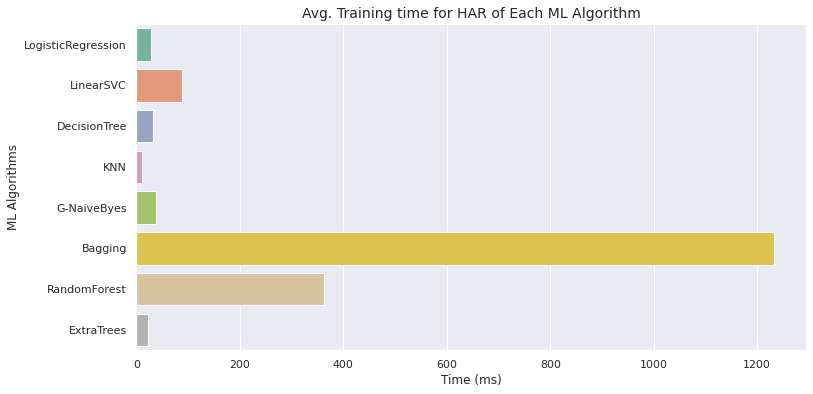

In [120]:
plt.title('Avg. Training time for HAR of Each ML Algorithm', fontsize=14)
sns.set(rc={'figure.figsize':(12,4)})
sns.set_palette("Set2", desat=0.90)
ax = sns.barplot(x = 'time', y = 'names', 
              data = models_df)
ax.set(xlabel='Time (ms)', ylabel='ML Algorithms')
plt.savefig('avg_time.png',dpi=300)
plt.show()